# 1. Problem definition
>How well can we predict the online shoppers purchasing intention, given its characteristics and previous examples of similar client's information.
#2. data 
The data is downloaded from the UCI Online Shoppers Purchasing Intention Dataset.
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

**Data Set Information:**

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

*   The dataset consists of 10 numerical and 8 categorical 
*   The 'Revenue' attribute can be used as the class label.

#3.Evaluation
The evaluation metric for this project is the F1-score  between the actual and predicted revenue .
#4. Features
* Administrative - count of pages visited by the visitor (e.g. user details and account)
* Administrative_Duration - total time spent (seconds) in on Administrative type of page
Informational - count of pages visited by the visitor (e.g. about and contact of the website)
* Informational_Duration - total time spent (seconds) in on Informational type of page
* ProductRelated - count of pages visited by the visitor (e.g. product details)
* ProductRelated_Duration - total time spent (seconds) in on ProductRelated type of page
* BounceRates - percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server
* ExitRates - the percentage of visitors to a page on the website from which they exit the website to a different website
PageValues - the average value for a page that a user visited before landing on the goal page
* SpecialDay - indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day)
* Month - the month of the visit to the website
* OperatingSystems - the type of operation system used by the visitor
* Browser - the type of browser used by the visitor
* Region - the geographic region from which the session started
* TrafficType - describes how traffic arrived on the website (Direct, Organic, Referral, Social, Email, Display and Paid)
* VisitorType - returning or new visitor or other
* Weekend - indicating whether the date of the visit is weekend
* Revenue: indicates whether the visitor made a purchase or not


In [112]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [2]:
!pip install feature_engine

     |████████████████████████████████| 205 kB 22.4 MB/s 
     |████████████████████████████████| 9.8 MB 47.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
!wget https://raw.githubusercontent.com/trainindata/deploying-machine-learning-models/master/section-04-research-and-development/preprocessors.py

--2022-01-05 10:08:27--  https://raw.githubusercontent.com/trainindata/deploying-machine-learning-models/master/section-04-research-and-development/preprocessors.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1406 (1.4K) [text/plain]
Saving to: ‘preprocessors.py’

preprocessors.py    100%[===================>]   1.37K  --.-KB/s    in 0s      

2022-01-05 10:08:27 (11.6 MB/s) - ‘preprocessors.py’ saved [1406/1406]



# Librairies

In [6]:
# data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder,
)

from feature_engine.transformation import LogTransformer

from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

import preprocessors as pp

# Load the data

In [8]:
#load the data 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv

--2022-01-05 10:10:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1072063 (1.0M) [application/x-httpd-php]
Saving to: ‘online_shoppers_intention.csv’

online_shoppers_int 100%[===================>]   1.02M  2.50MB/s    in 0.4s    

2022-01-05 10:10:27 (2.50 MB/s) - ‘online_shoppers_intention.csv’ saved [1072063/1072063]



In [10]:
data=pd.read_csv('/content/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Analysis

In [14]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [19]:
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [57]:
#boolean to numeric
data['Revenue']=data['Revenue'].astype(int)

# Analysis 
1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
* Discrete
* Continuous
* Distributions
* Transformations
5. Categorical variables
* Cardinality
* Rare Labels
* Special mappings
* Additional Reading Resources

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [20]:
df.Weekend.value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

## Target
Let's begin by exploring the target distribution.

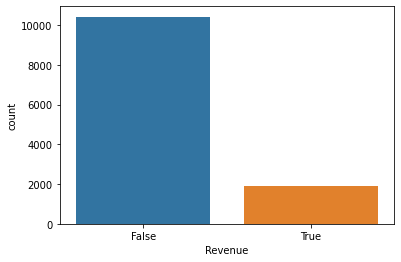

In [16]:
#Our target variable
ax = sns.countplot(x="Revenue", data=df)

#Variable types

#Categorical Variables

* Browser - the type of browser used by the visitor
* Region - the geographic region from which the session started
* TrafficType - describes how traffic arrived on the website (Direct, Organic, Referral, Social, Email, Display and Paid)
* VisitorType - returning or new visitor or other

In [29]:
# lets add MSSubClass to the list of categorical variables
cat_vars = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
data[cat_vars].astype(object)
# number of categorical variables
len(cat_vars)

7

# Numeric Variables

In [30]:
num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'Revenue'
]
# number of numerical variables
len(num_vars)

10

In [31]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  10


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0


# Discrete variables

In [77]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 15]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


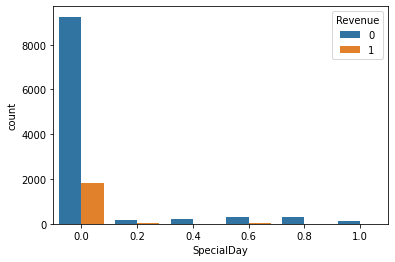

In [87]:
for var in discrete_vars:
  ax = sns.countplot(x=var, hue="Revenue", data=data)

In [78]:
data[discrete_vars]

,SpecialDay
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
12325,0.0
12326,0.0
12327,0.0
12328,0.0


In [80]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  9


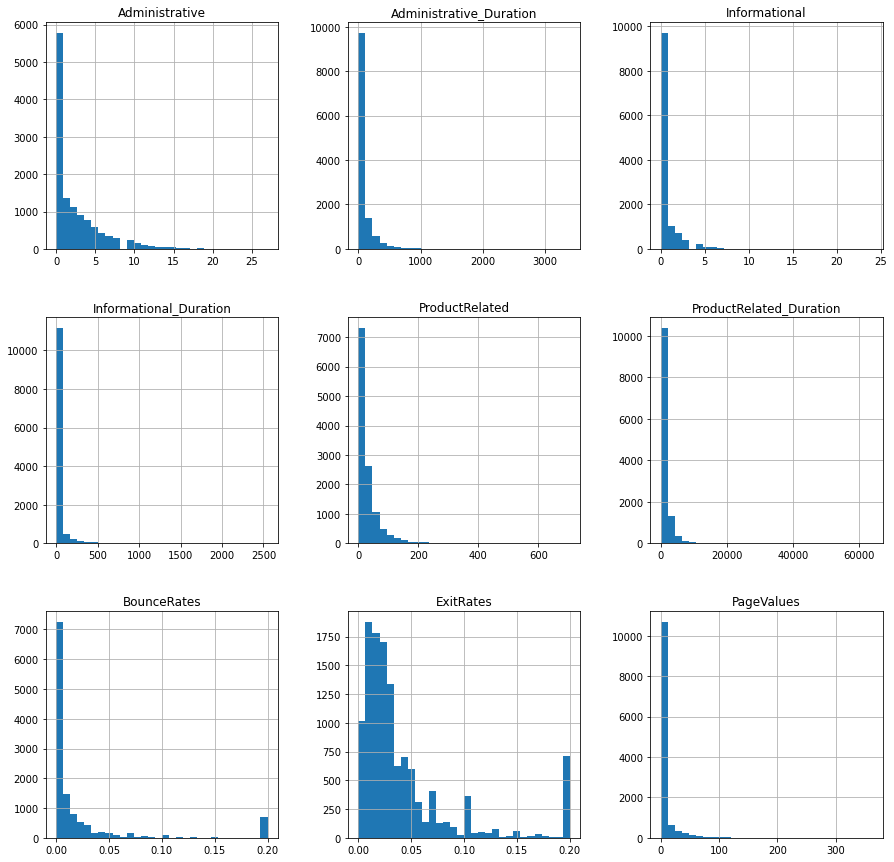

In [81]:
# lets plot histograms for all continuous variables

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed. And there are a particular few that are extremely skewed.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johnson transformation to the variables.

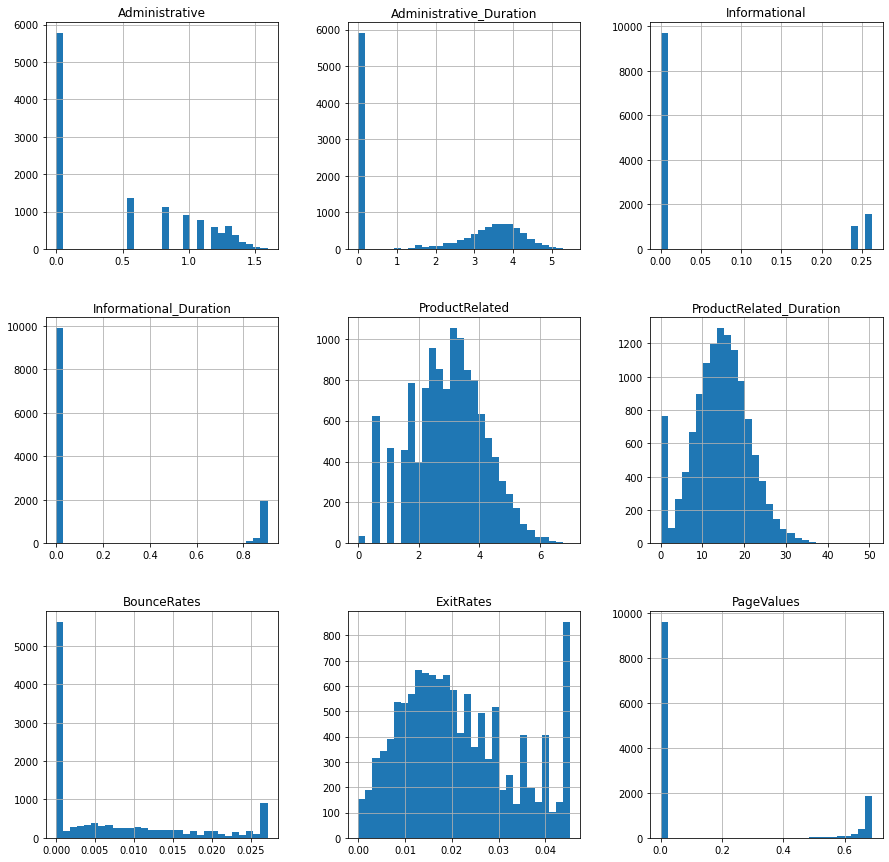

In [82]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = data.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(data[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [83]:
cont_vars

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

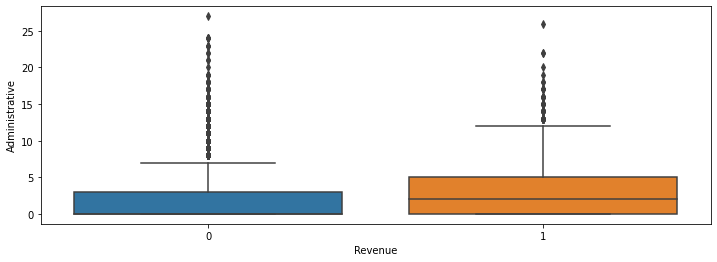

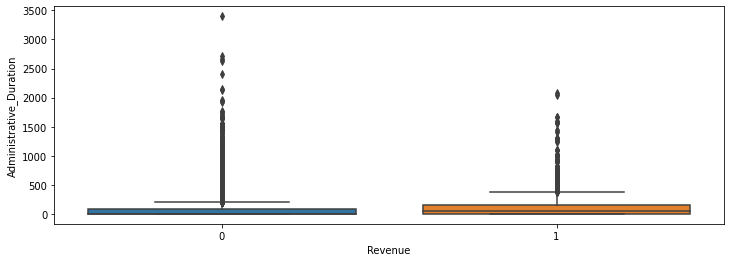

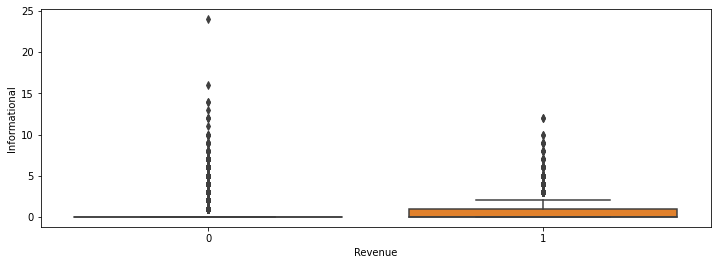

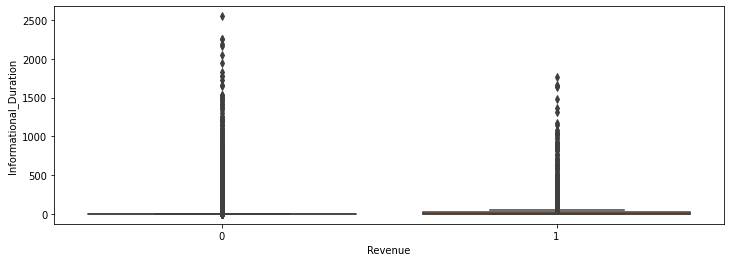

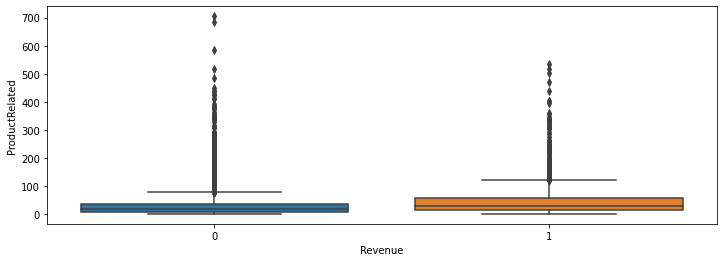

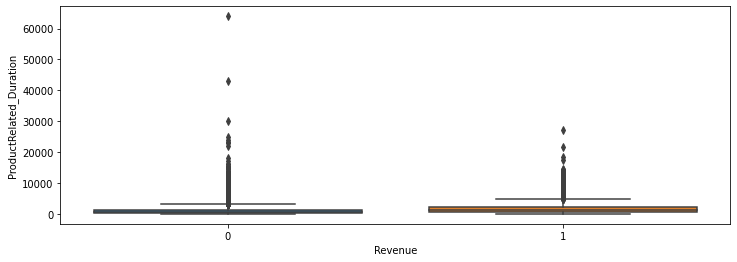

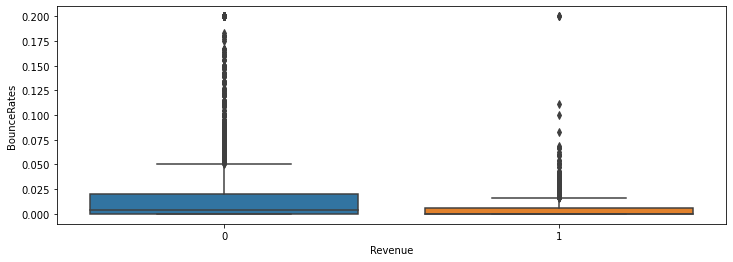

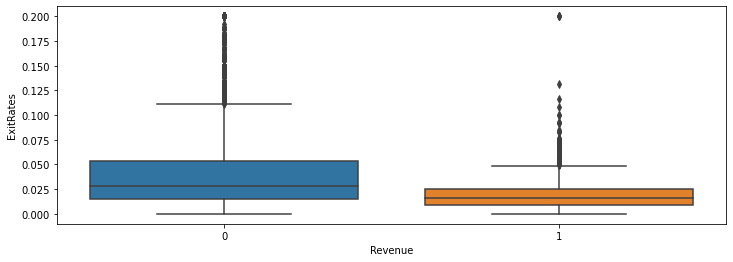

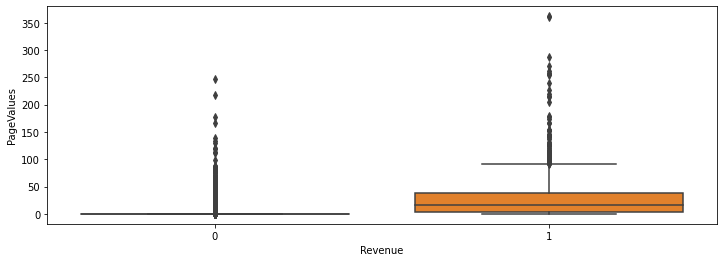

In [84]:
for var in cont_vars:
  plt.figure(figsize=(12,4))
  ax = sns.boxplot(x="Revenue", y=var, data=data)
  

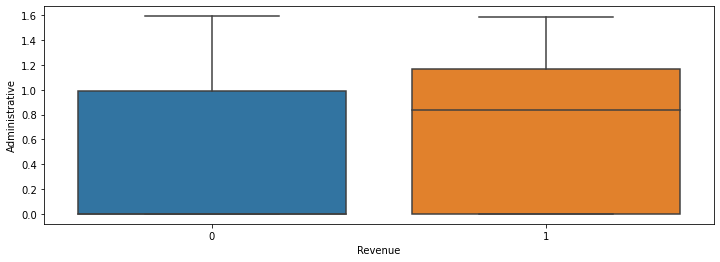

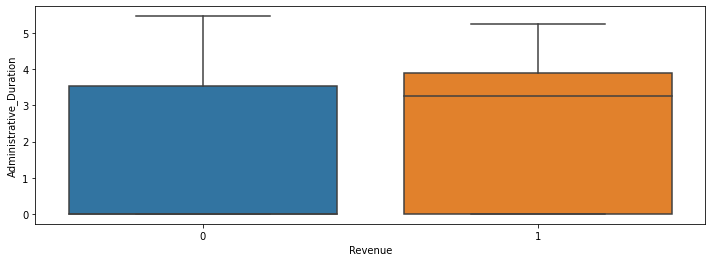

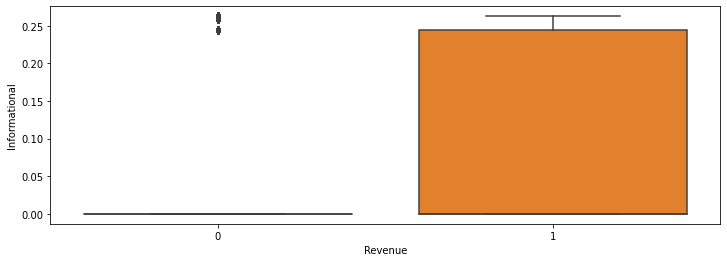

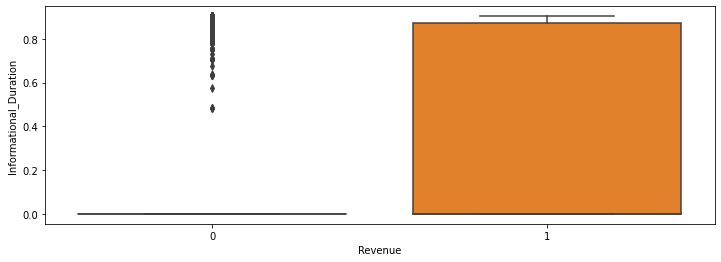

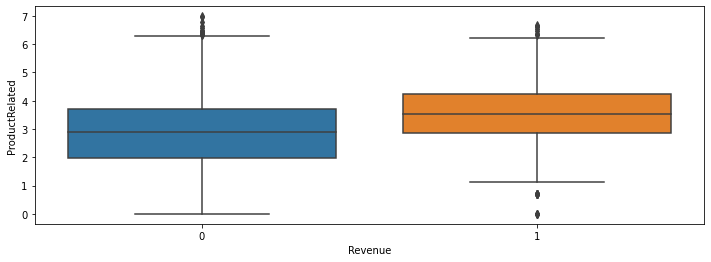

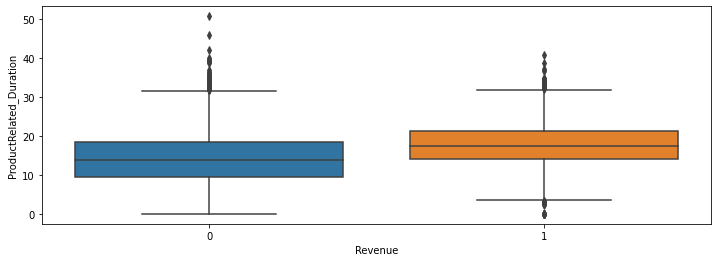

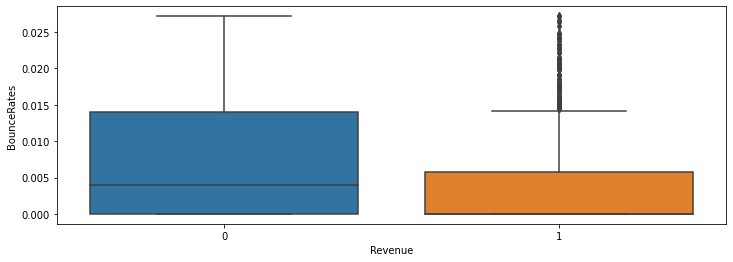

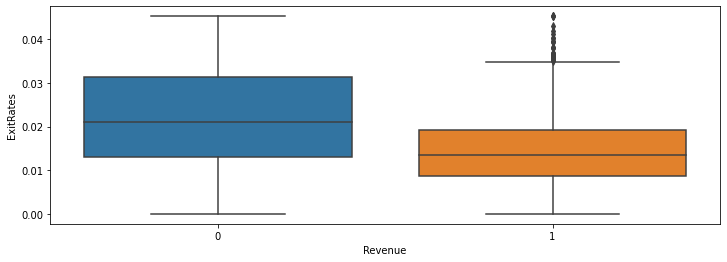

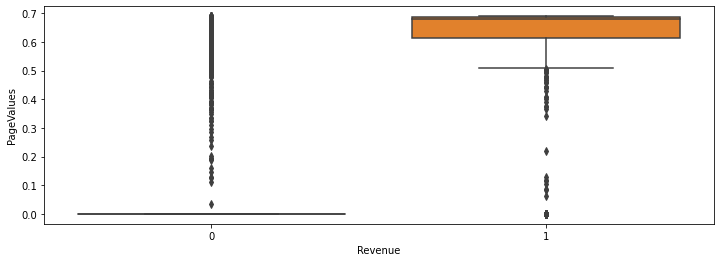

In [85]:
for var in cont_vars:
  plt.figure(figsize=(12,4))
  ax = sns.boxplot(x="Revenue", y=var, data=tmp)

# Configuration

In [88]:
cat_vars

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [ ]:
CATEGORICAL_VARS=cat_vars
NUMERICAL_VARS=num_vars

In [106]:
data[CATEGORICAL_VARS] = df[CATEGORICAL_VARS].astype(object)

In [107]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Revenue'], axis=1), # predictive variables
    data['Revenue'], # target
    test_size=0.2, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((9864, 17), (2466, 17))

In [91]:
cont_vars

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [99]:
CATEGORICAL_VARS=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
CONT_VARS=['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']


In [115]:
from sklearn.ensemble import RandomForestClassifier
from feature_engine.encoding import (
    RareLabelEncoder,
    OrdinalEncoder,
    OneHotEncoder
)
from xgboost import XGBClassifier

In [ ]:
X_train[CATEGORICAL_VARS].

In [134]:
!pip install catboost


     |████████████████████████████████| 76.3 MB 53 kB/s 


In [135]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from catboost import CatBoostClassifier

In [145]:
# set up the pipeline
purchase_pipe = Pipeline([
                          ('categorical_encoder', OneHotEncoder(variables=CATEGORICAL_VARS)),
                          #('yeojohnson', stats.yeojohnson(variables=CONT_VARS)),
                          ('scaler', MinMaxScaler()),
                          ('smote', SMOTE(sampling_strategy=0.3)),
                          ('under', RandomUnderSampler(sampling_strategy=0.5)),
                          ('Catboost', CatBoostClassifier(iterations=1000,                          
                           devices='0:1',
                           verbose=0)),
                          ])


In [146]:
# train the pipeline
purchase_pipe.fit(X_train, y_train)

Pipeline(steps=[('categorical_encoder',
                 OneHotEncoder(variables=['Month', 'OperatingSystems',
                                          'Browser', 'Region', 'TrafficType',
                                          'VisitorType'])),
                ('scaler', MinMaxScaler()),
                ('smote', SMOTE(sampling_strategy=0.3)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('Catboost',
                 <catboost.core.CatBoostClassifier object at 0x7f9dc3296310>)])

In [147]:
y_pred = purchase_pipe.predict(X_test)

In [148]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2044
           1       0.63      0.70      0.67       422

    accuracy                           0.88      2466
   macro avg       0.79      0.81      0.80      2466
weighted avg       0.89      0.88      0.88      2466



In [144]:
result_model_1=calculate_results(y_true=y_test, y_pred=y_pred)
result_model_1

{'accuracy': 88.48337388483374,
 'f1': 0.8867743585373834,
 'precision': 0.8892822343998014,
 'recall': 0.8848337388483374}